# CS6140: Machine Learning Fall 2024

## Exploratory Data Analysis (EDA)

You are a data scientist at an analytics firm specializing in real estate and
tourism. Your team is tasked with analyzing Airbnb data to provide insights
that will help optimize property listings and improve guest satisfaction. Your
task is to focus on Airbnb Listings dataset and the Reviews dataset (and the
data dictionary). 

### Preprocessing Data

#### Step 1: Installing the required libraries

We would be needing textblob (for sentiment analysis) and wordcloud (for identifying the mostly used words in the positive and the negative reviews). We use the python package installer (pip) in-order to install these packages

In [1]:
!pip install textblob

In [2]:
!pip install wordcloud

#### Step 2: Importing all the required modules

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from textblob import TextBlob
from wordcloud import WordCloud


# ignore all the warnings
warnings.filterwarnings('ignore')

#### Step 4: Loading the listing dataset and having some basic understanding of the dataset

In [329]:
city = 'hawaii'
listings = pd.read_csv(f'data/{city}/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20240913025425,2024-09-13,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.87,5.00,4.84,119-269-5808-01R,f,2,2,0,0,0.23
1,5387,https://www.airbnb.com/rooms/5387,20240913025425,2024-09-13,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.88,4.75,4.77,TA-163-133-0304-01,t,2,2,0,0,1.26
2,5480,https://www.airbnb.com/rooms/5480,20240913025425,2024-09-13,city scrape,Isle Of You Naturally Farm Retreat,The Best Choice for your Clothing Optional Nud...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
3,5532,https://www.airbnb.com/rooms/5532,20240913025425,2024-09-14,previous scrape,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,This split-level condo is right across the str...,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,7888,https://www.airbnb.com/rooms/7888,20240913025425,2024-09-13,city scrape,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We offer a medium term rental requiring a mini...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,...,4.76,4.25,4.60,GE-104-390-7584-01,f,1,1,0,0,0.74


#### Step 5: Filtering out the required fields from the dataset

In [331]:
required_columns = ['id', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating', 'instant_bookable', 'reviews_per_month', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [332]:
listings = listings.loc[:, required_columns]

In [333]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35295 entries, 0 to 35294
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            35295 non-null  int64  
 1   host_response_rate            32324 non-null  object 
 2   host_is_superhost             34572 non-null  object 
 3   neighbourhood_cleansed        35295 non-null  object 
 4   neighbourhood_group_cleansed  35295 non-null  object 
 5   latitude                      35295 non-null  float64
 6   longitude                     35295 non-null  float64
 7   property_type                 35295 non-null  object 
 8   room_type                     35295 non-null  object 
 9   amenities                     35295 non-null  object 
 10  price                         31763 non-null  object 
 11  minimum_nights                35295 non-null  int64  
 12  maximum_nights                35295 non-null  int64  
 13  a

In [334]:
listings.describe()

,id,latitude,longitude,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.529500e+04,35295.000000,35295.000000,35295.000000,35295.000000,35295.000000,27138.000000,27138.000000,35295.000000,27127.000000,27127.000000,27125.000000,27127.000000,27126.000000,27126.000000
mean,4.659985e+17,20.901013,-157.203703,10.342683,551.069217,200.509846,4.782053,1.137002,36.325202,4.798640,4.766933,4.849183,4.835128,4.867036,4.679713
std,4.724993e+17,0.814169,1.282784,33.039800,458.292512,115.342261,0.341040,1.301236,70.200077,0.354517,0.342493,0.307386,0.329644,0.238593,0.386031
min,5.269000e+03,18.920250,-159.714620,1.000000,1.000000,0.000000,1.000000,0.010000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.656239e+07,20.686771,-157.839425,1.000000,90.000000,97.000000,4.710000,0.220000,1.000000,4.750000,4.680000,4.830000,4.800000,4.830000,4.590000
50%,5.724819e+17,20.958320,-156.691060,2.000000,365.000000,222.000000,4.880000,0.660000,8.000000,4.900000,4.870000,4.940000,4.940000,4.930000,4.770000
75%,9.071696e+17,21.309895,-156.338140,5.000000,1125.000000,297.000000,5.000000,1.670000,40.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000
max,1.243835e+18,22.229090,-154.841000,1000.000000,1825.000000,365.000000,5.000000,25.250000,1332.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Step 6: Finding out which are the columns that contain null values

In [336]:
values_contains_null = listings.columns[listings.isna().any()].tolist()
values_contains_null

['host_response_rate',
 'host_is_superhost',
 'price',
 'review_scores_rating',
 'reviews_per_month',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [337]:
len(values_contains_null)

11

### Task 1

Descriptive Statistics Calculate summary statistics for numerical features such as `price`,`minimum_nights`, `maximum_nights`, `number_of_reviews`, and `review_scores_rating`. Understand the central tendency, dispersion, and distribution of these variables

#### Identifying all the numerical columns present in the dataframe

In [340]:
numerical_columns = listings.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'latitude', 'longitude', 'minimum_nights', 'maximum_nights',
       'availability_365', 'review_scores_rating', 'reviews_per_month',
       'number_of_reviews', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

#### Type Casting: Price - Object to Float

In [342]:
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True)
listings['price'] = listings['price'].astype('float')
listings['price'].dtype

dtype('float64')

#### Descriptive Statistics

To analyse the mean, median and mode for specific fields and checking the count of the NaN values.

In [344]:
def count_null(df, columns):
    for column in columns:
        print(f"{column} missing values: {df[column].isnull().sum()}")

In [345]:
required_columns = [
    'price',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

In [346]:
count_null(listings, required_columns)

price missing values: 3532
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 8157
review_scores_accuracy missing values: 8168
review_scores_cleanliness missing values: 8168
review_scores_checkin missing values: 8170
review_scores_communication missing values: 8168
review_scores_location missing values: 8169
review_scores_value missing values: 8169
reviews_per_month missing values: 8157


##### Dropping the NaN values

In [348]:
not_null_listings = listings.dropna(subset=required_columns)
count_null(not_null_listings, required_columns)

price missing values: 0
minimum_nights missing values: 0
maximum_nights missing values: 0
number_of_reviews missing values: 0
review_scores_rating missing values: 0
review_scores_accuracy missing values: 0
review_scores_cleanliness missing values: 0
review_scores_checkin missing values: 0
review_scores_communication missing values: 0
review_scores_location missing values: 0
review_scores_value missing values: 0
reviews_per_month missing values: 0


In [349]:
not_null_listings.describe()

,id,latitude,longitude,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.502000e+04,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000
mean,3.569079e+17,20.885152,-157.186307,314.318625,6.413309,570.043165,217.540288,4.782709,1.189144,49.371383,4.802684,4.766599,4.850716,4.835682,4.867127,4.678518
std,4.392353e+17,0.830021,1.307217,473.232686,18.777601,466.445548,100.839039,0.333486,1.321222,78.486676,0.338019,0.335092,0.298954,0.322138,0.234518,0.378518
min,5.269000e+03,18.920250,-159.714620,10.000000,1.000000,1.000000,0.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.983084e+07,20.080535,-157.839220,148.000000,1.000000,90.000000,144.000000,4.710000,0.250000,5.000000,4.750000,4.680000,4.830000,4.800000,4.830000,4.580000
50%,5.068202e+07,20.959290,-156.690465,214.000000,2.000000,365.000000,236.000000,4.880000,0.710000,20.000000,4.900000,4.860000,4.940000,4.940000,4.930000,4.760000
75%,7.833516e+17,21.305377,-155.994160,333.000000,4.000000,1125.000000,300.000000,5.000000,1.760000,61.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000
max,1.237996e+18,22.229090,-154.841000,22500.000000,365.000000,1125.000000,365.000000,5.000000,25.250000,1332.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Central Tendency

Finding the measures of central tendency for the selected columns and representing the distribution as a box-plot.

In [351]:
def _box_plot(ax, df, column_name):
    mean_price = df[column_name].mean()
    median_price = df[column_name].median()
    mode_price = df[column_name].mode()[0]
    
    sns.boxplot(y=df[column_name], ax=ax, color='lightblue')
    
    ax.scatter(0, mean_price, color='red', label=f'Mean: {mean_price:.2f}', zorder=5)
    ax.scatter(0, median_price, color='green', label=f'Median: {median_price:.2f}', zorder=5)
    ax.scatter(0, mode_price, color='purple', label=f'Mode: {mode_price:.2f}', zorder=5)
    
    ax.set_title(f'{column_name.capitalize()}')
    ax.set_ylabel(column_name.capitalize())
    ax.legend()


def box_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))  
    axes = axes.flatten()  
    
    for i, column in enumerate(columns):
        _box_plot(axes[i], df, column)
    
    plt.tight_layout()
    plt.show()

#### Box Plot Distribution - Before removing the NaN values

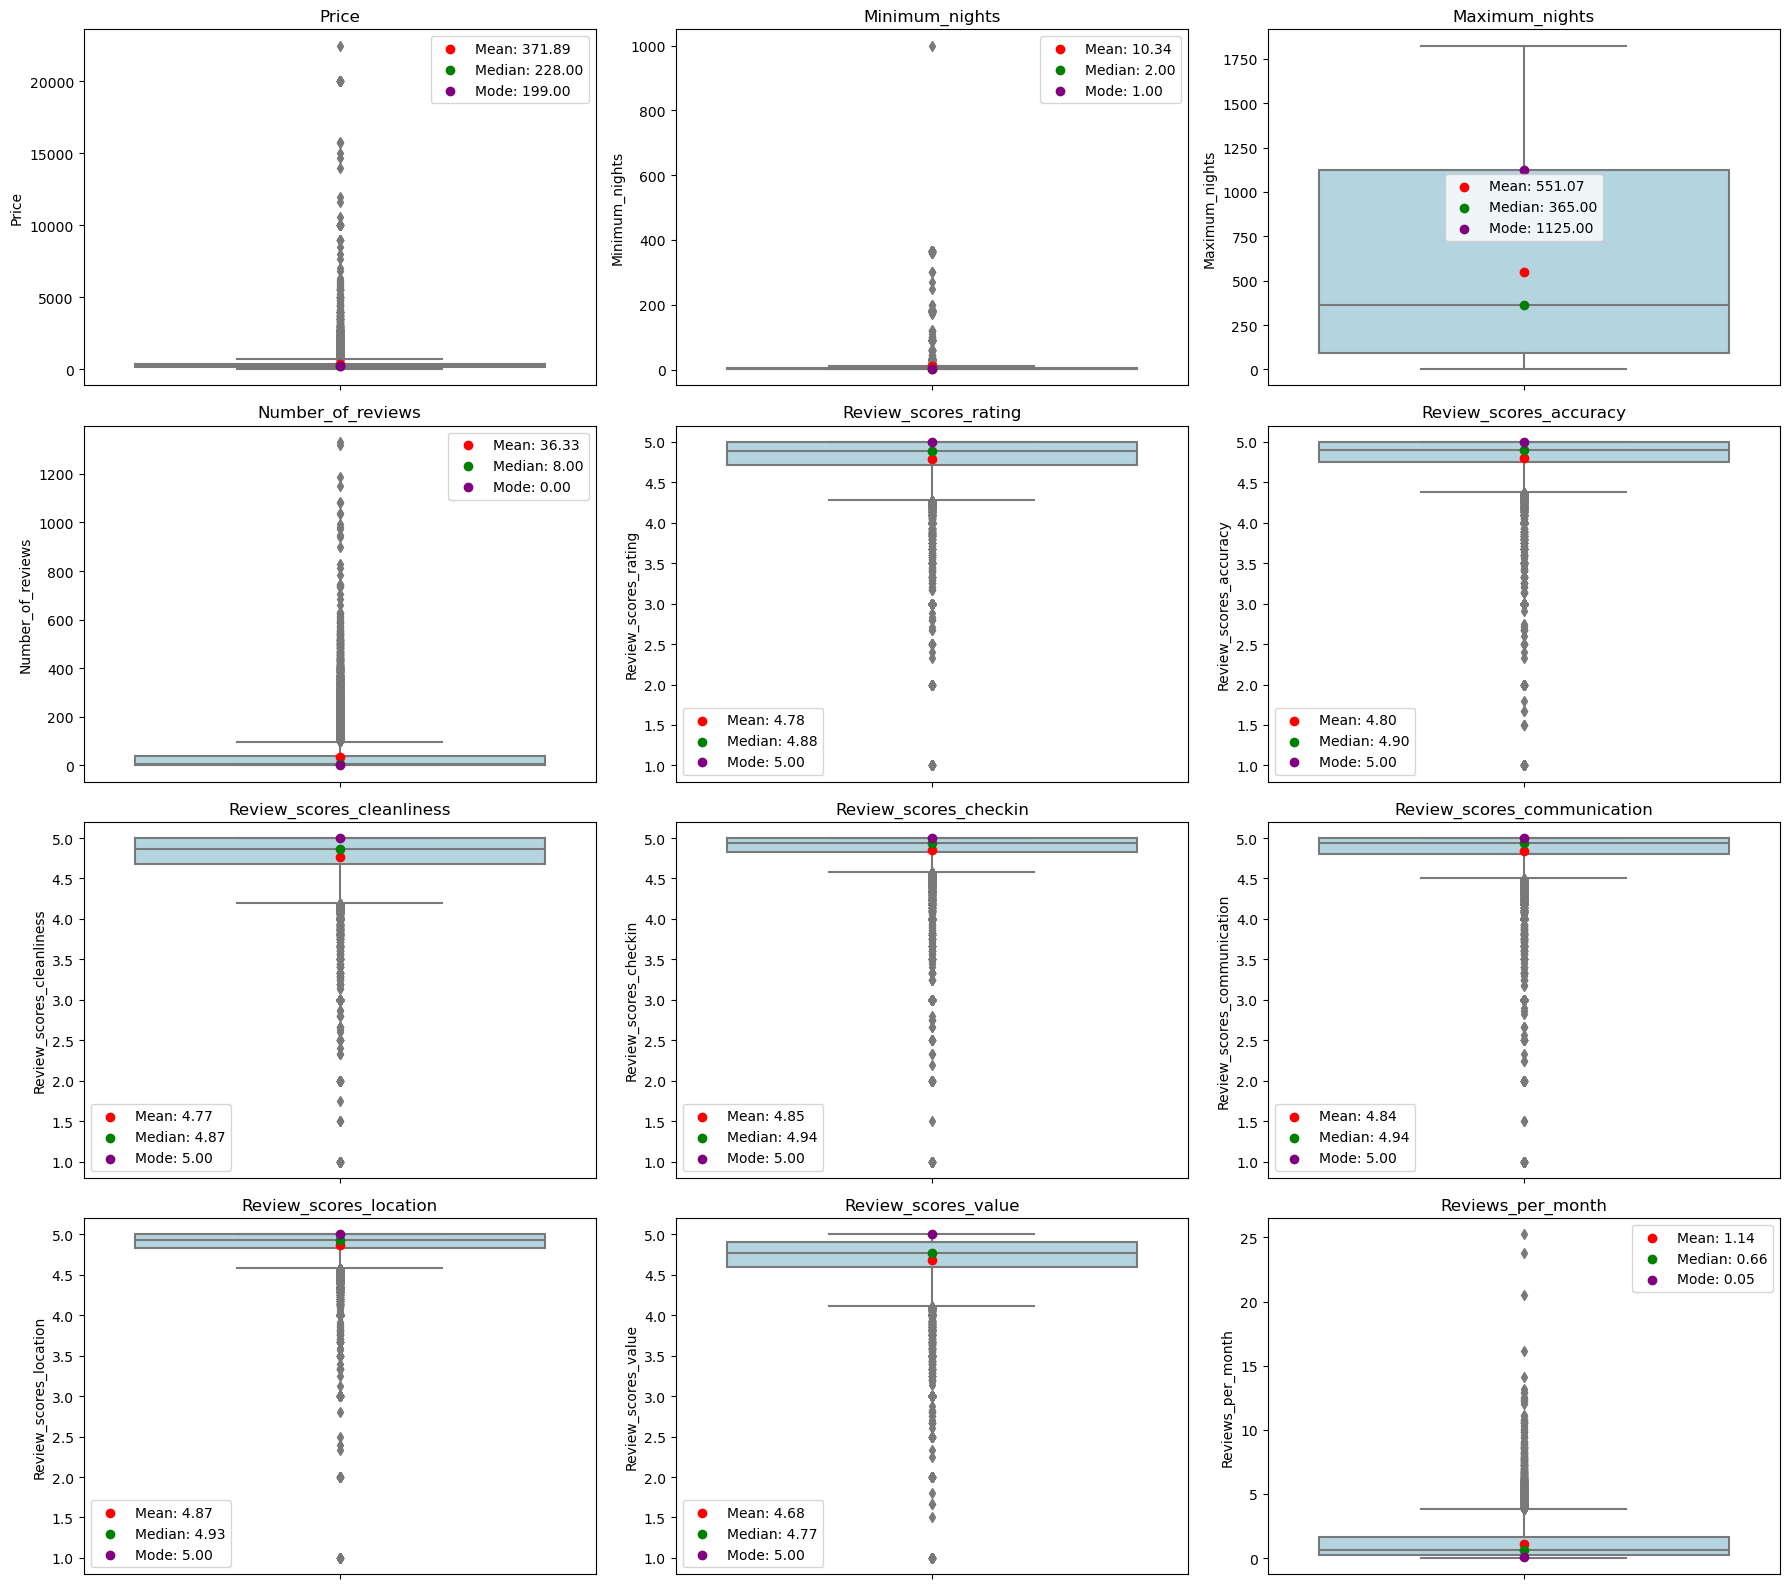

In [353]:
box_plot(listings, required_columns)

#### Box Plot Distribution - After removing the NaN values

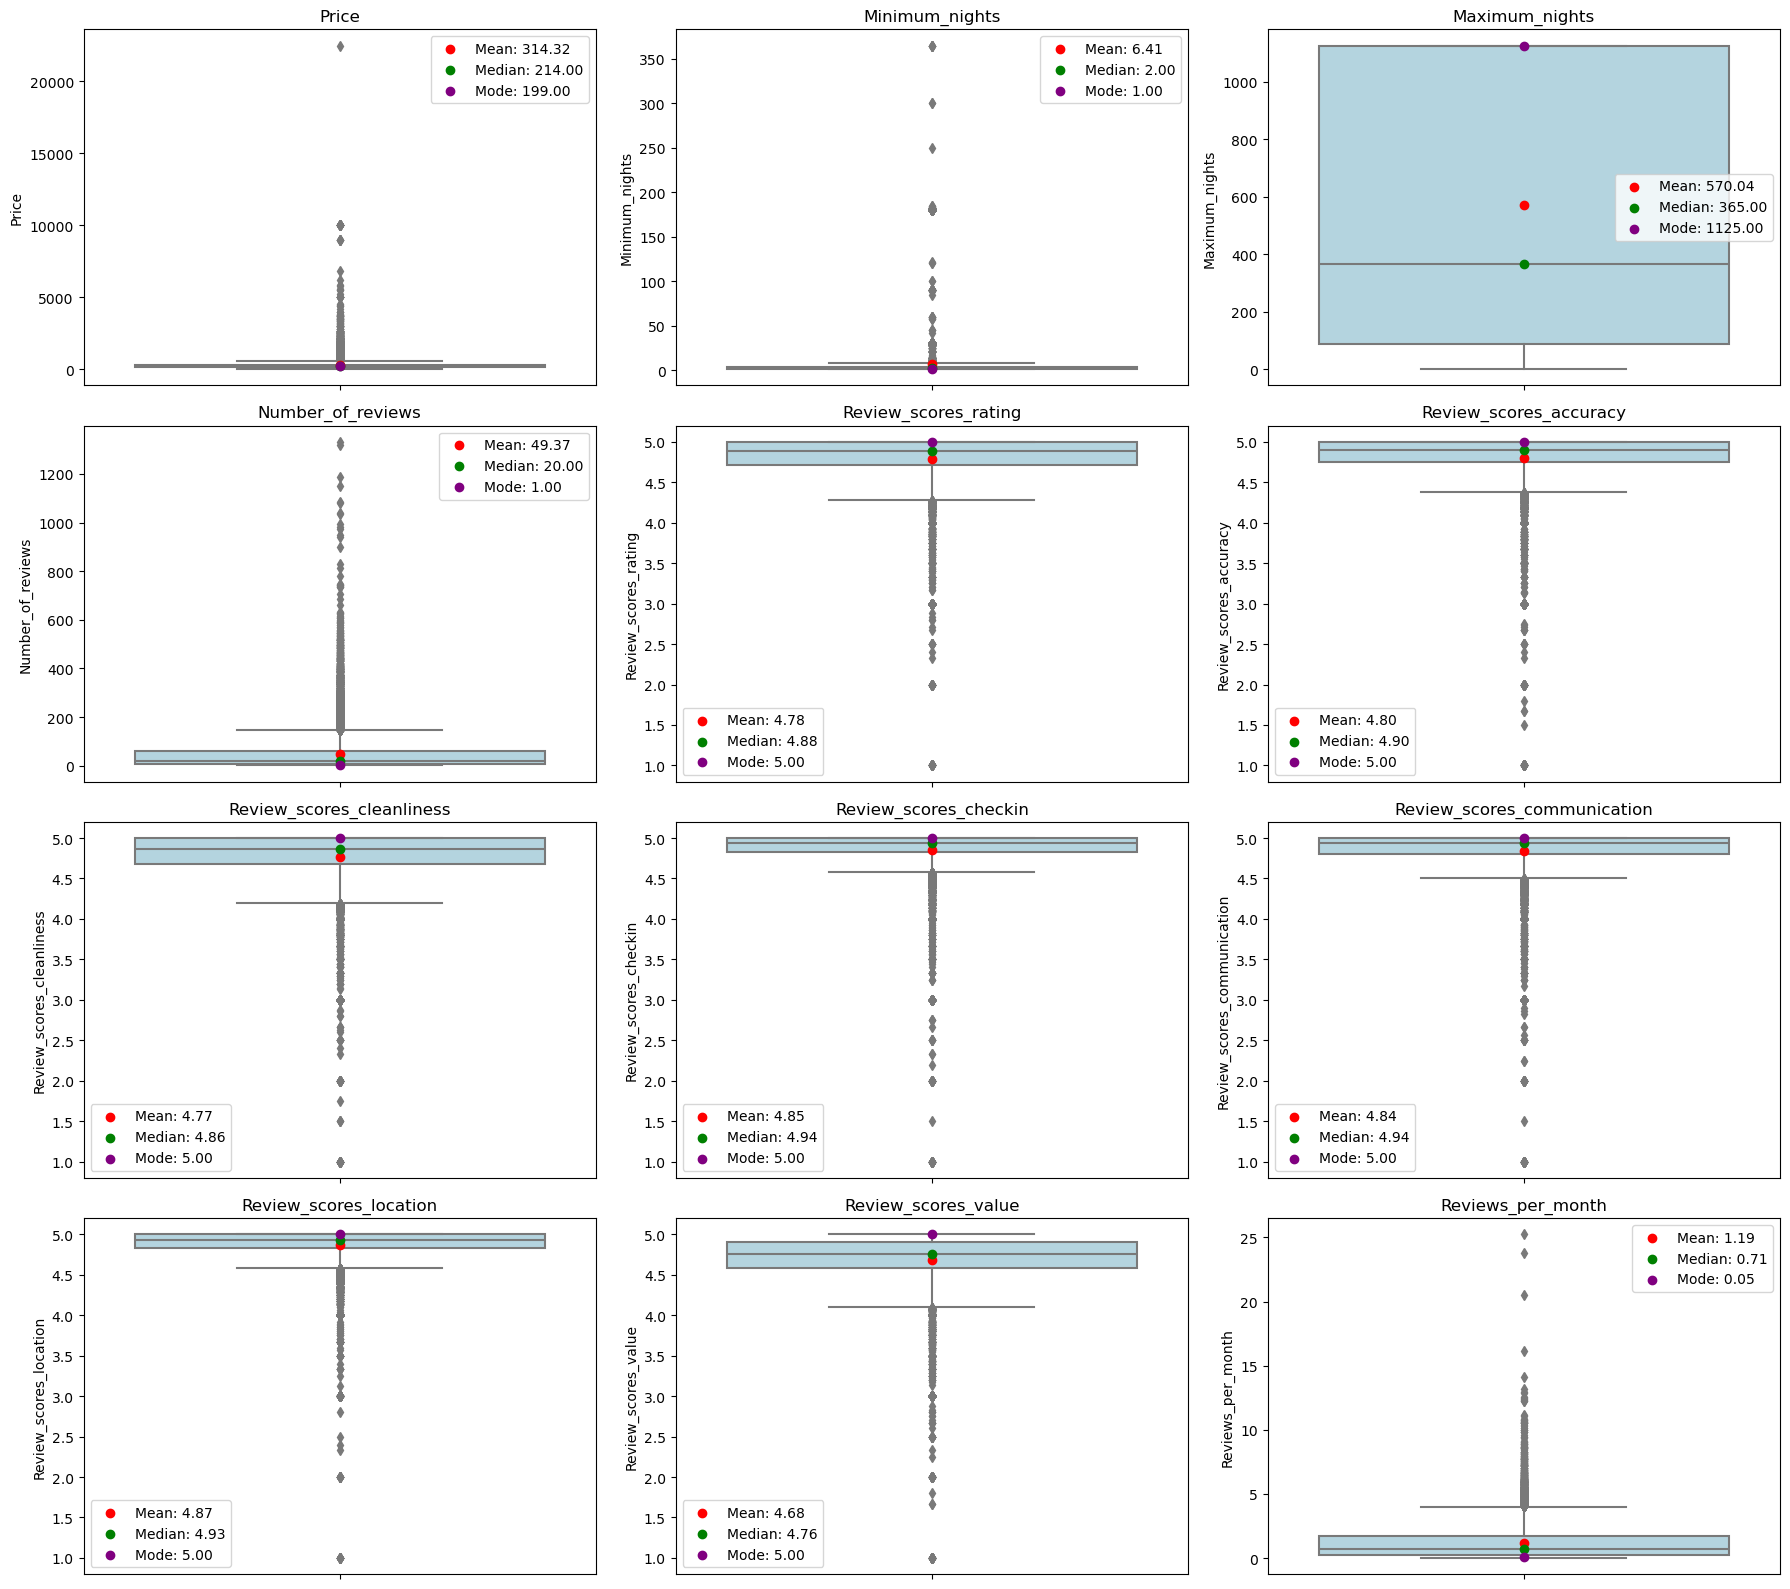

In [355]:
box_plot(not_null_listings, required_columns)

#### Dispersion

In [357]:
def violin_plot(df, columns):
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        col_data = df[column].dropna()
        variance = col_data.var()
        std_dev = col_data.std()
        data_range = col_data.max() - col_data.min()
        iqr = col_data.quantile(0.75) - col_data.quantile(0.25)
        
        sns.violinplot(y=col_data, ax=axes[i], color='lightblue')
        
        stats_text = (f'Variance: {variance:.2f}\n'
                      f'Std Dev: {std_dev:.2f}\n'
                      f'Range: {data_range:.2f}\n'
                      f'IQR: {iqr:.2f}')
        
        axes[i].set_title(f'{column.capitalize()}')
        axes[i].set_ylabel(column.capitalize())
        axes[i].text(0.65, 0.8, stats_text, transform=axes[i].transAxes, verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

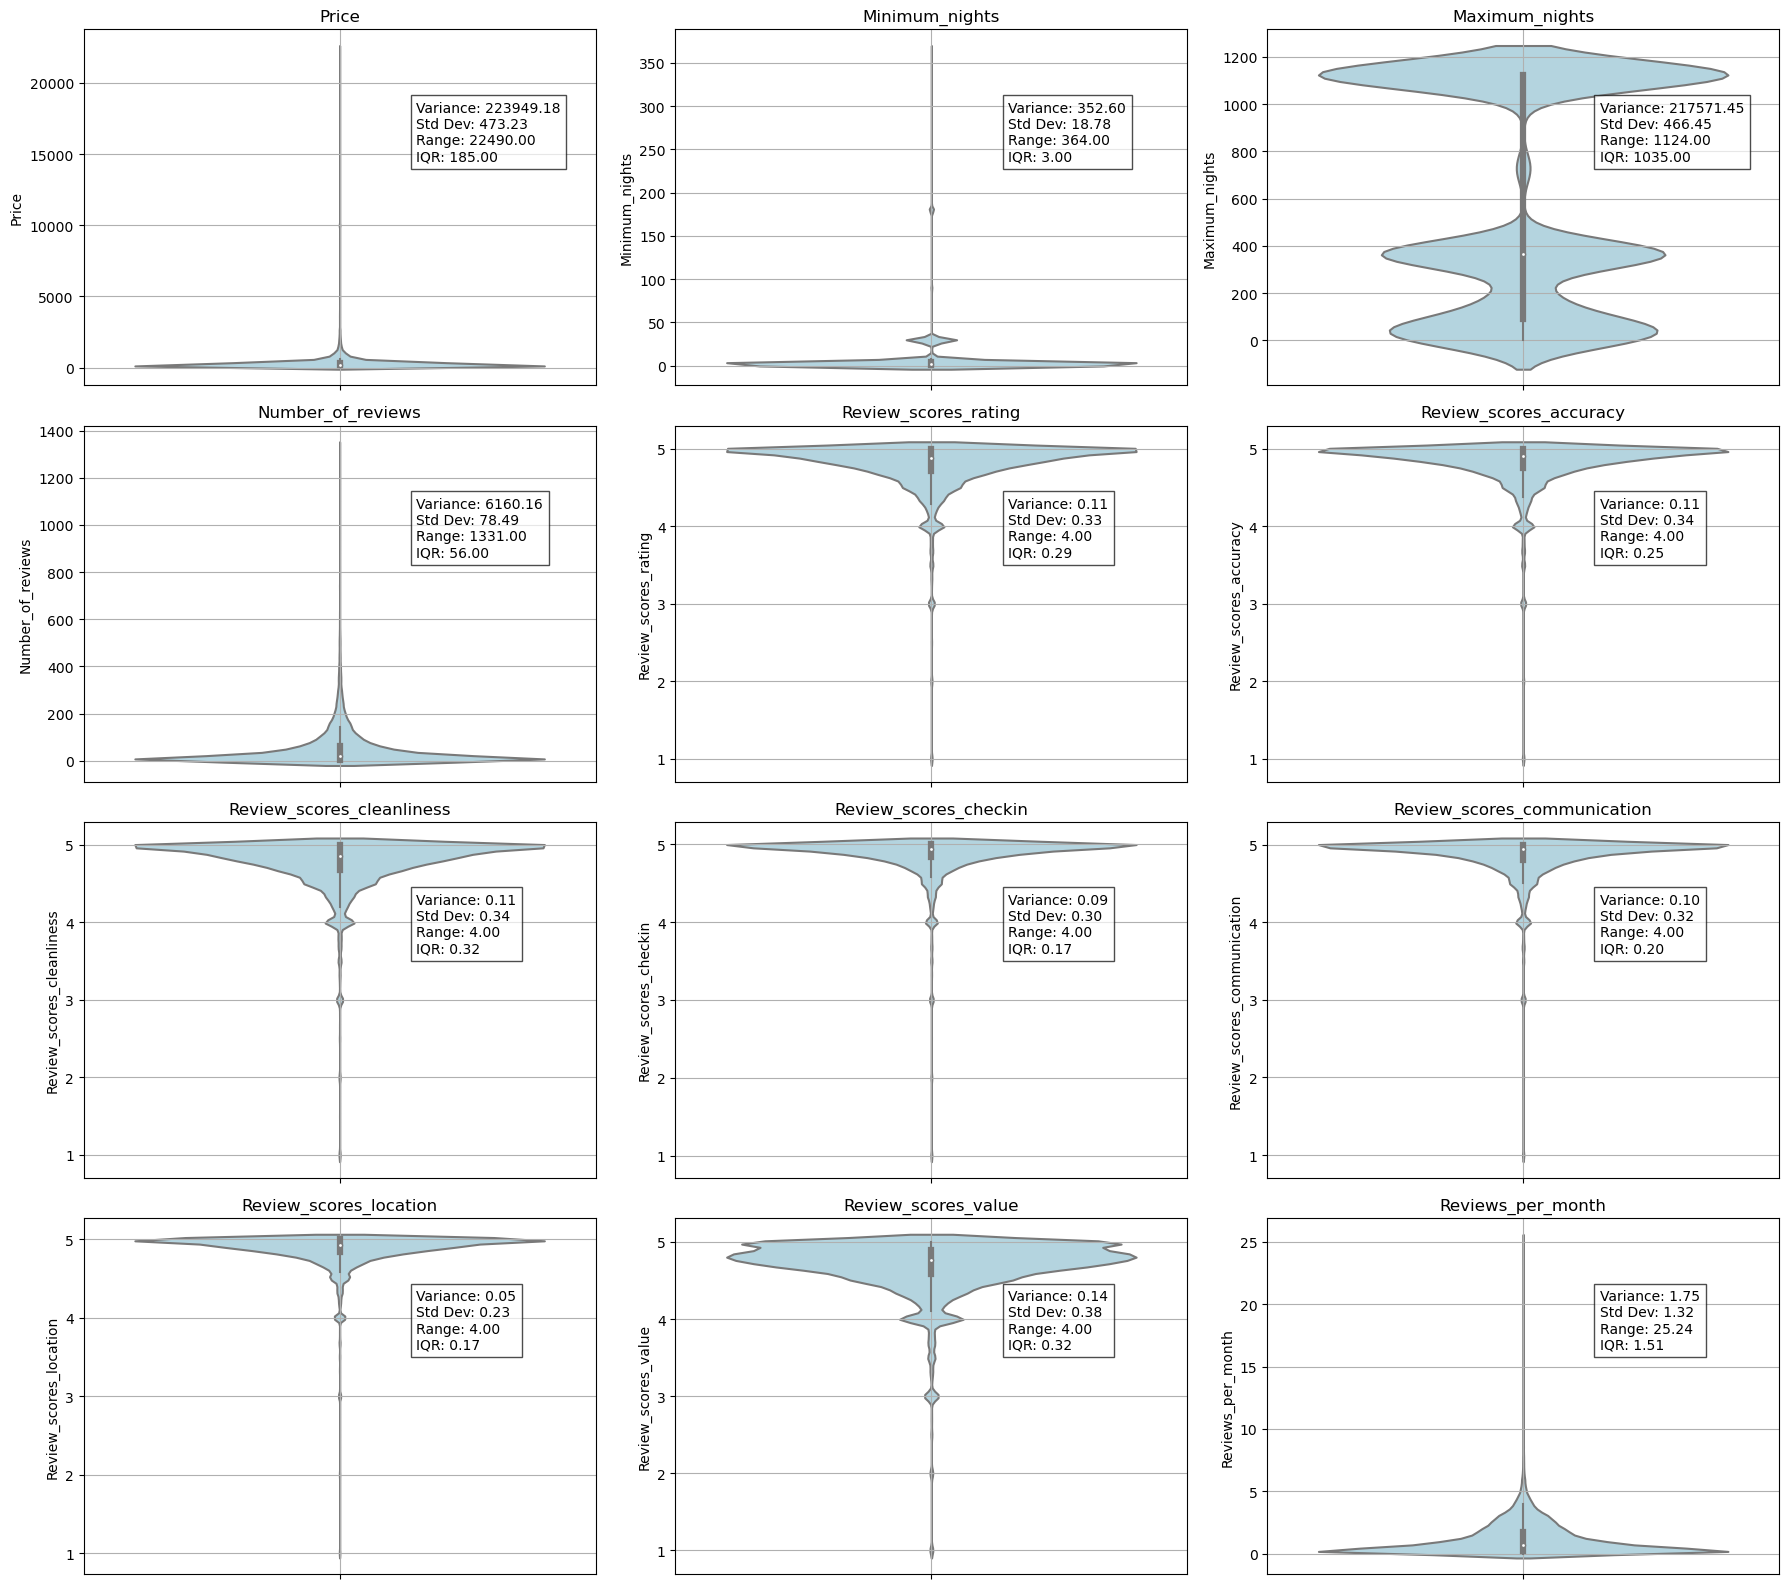

In [358]:
violin_plot(not_null_listings, required_columns)

#### Distribution

In [360]:
not_null_listings[required_columns].describe()

,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000
mean,314.318625,6.413309,570.043165,49.371383,4.782709,4.802684,4.766599,4.850716,4.835682,4.867127,4.678518,1.189144
std,473.232686,18.777601,466.445548,78.486676,0.333486,0.338019,0.335092,0.298954,0.322138,0.234518,0.378518,1.321222
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,148.000000,1.000000,90.000000,5.000000,4.710000,4.750000,4.680000,4.830000,4.800000,4.830000,4.580000,0.250000
50%,214.000000,2.000000,365.000000,20.000000,4.880000,4.900000,4.860000,4.940000,4.940000,4.930000,4.760000,0.710000
75%,333.000000,4.000000,1125.000000,61.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,1.760000
max,22500.000000,365.000000,1125.000000,1332.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,25.250000


### Task 2 - Distribution Analysis
Plot histograms or density plots for key numerical features like `price`,
`minimum_nights`, and `review_scores_rating`. Analyze the distribution of
these features to identify any skewness or outliers.


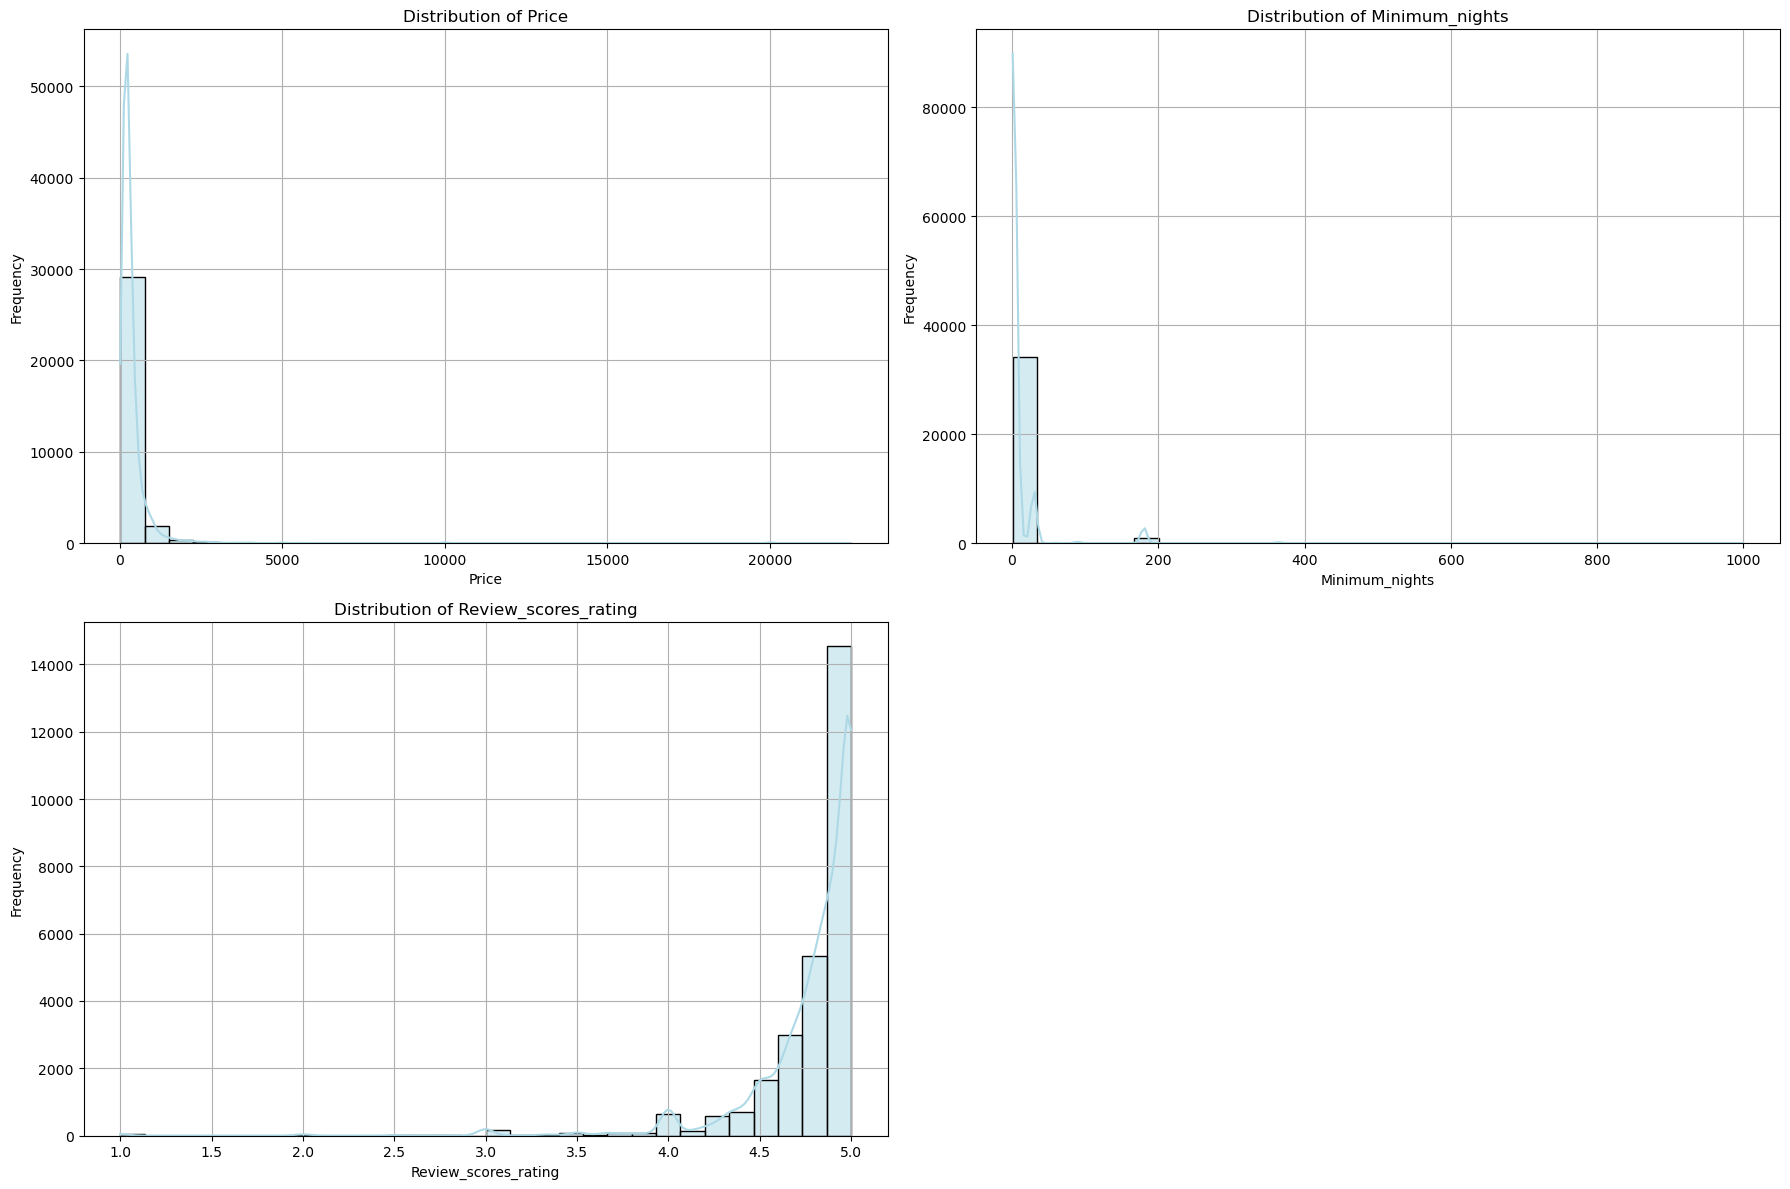

In [362]:
features = ['price', 'minimum_nights', 'review_scores_rating']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(listings[feature], bins=30, kde=True, color='lightblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Identifying skewness and outliers for the three attributes - price, minimum_ nights and review_scores_rating 

In [364]:
for feature in features:
    skewness = listings[feature].skew()
    print(f'Skewness of {feature}: {skewness}\n')

    Q1 = listings[feature].quantile(0.25)
    Q3 = listings[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    print(outlier_thresholds)
    outliers = listings[(listings[feature] < outlier_thresholds[0]) | (listings[feature] > outlier_thresholds[1])]

    print(f'Number of outliers in {feature}: {len(outliers)}\n')
    print('\n---------------------------------------------------------------\n')

Skewness of price: 16.46137817432114

(-174.5, 701.5)
Number of outliers in price: 2904


---------------------------------------------------------------

Skewness of minimum_nights: 6.357434272848558

(-5.0, 11.0)
Number of outliers in minimum_nights: 4242


---------------------------------------------------------------

Skewness of review_scores_rating: -4.392031931474175

(4.275, 5.4350000000000005)
Number of outliers in review_scores_rating: 1540


---------------------------------------------------------------



#### Removing the outliers from the price column and plotting the histogram and the distribution graph

In [366]:
filter_price =  not_null_listings[not_null_listings['price'] <= 700]

In [367]:
def histogram_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].hist(before[column_name], bins=5, color='blue', edgecolor='black')
    axes[0].set_title('Histogram before removing outliers')
    axes[0].set_xlabel(f'Values in {column_name}')
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(after[column_name], bins=5, color='green', edgecolor='black')
    axes[1].set_title('Histogram after removing outliers')
    axes[1].set_xlabel(f'Values in {column_name}')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

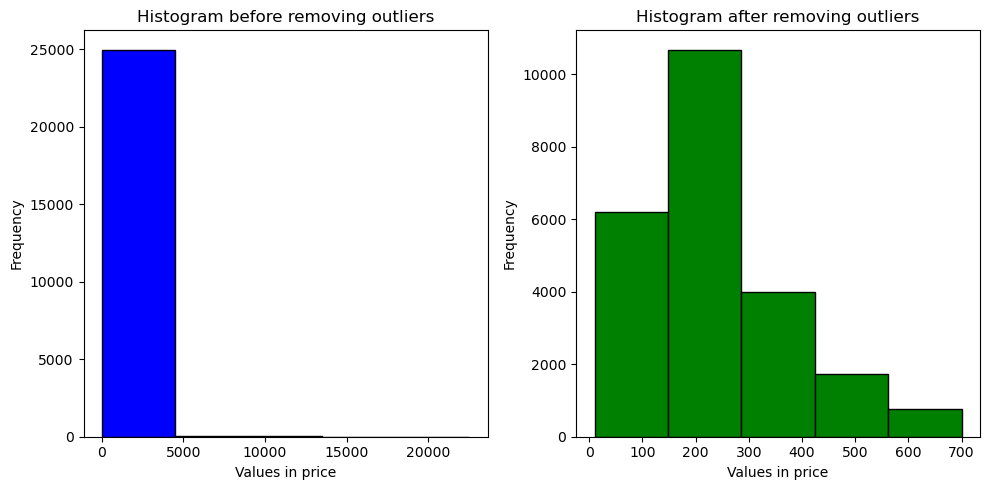

In [368]:
histogram_plot(not_null_listings, filter_price, 'price')

In [369]:
def density_plot(before, after, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.kdeplot(before[column_name], ax=axes[0], color='blue', shade=True)
    axes[0].set_title('Distribution before removing outliers')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')
    
    sns.kdeplot(after[column_name], ax=axes[1], color='green', shade=True)
    axes[1].set_title('Distribution after removing outliers')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

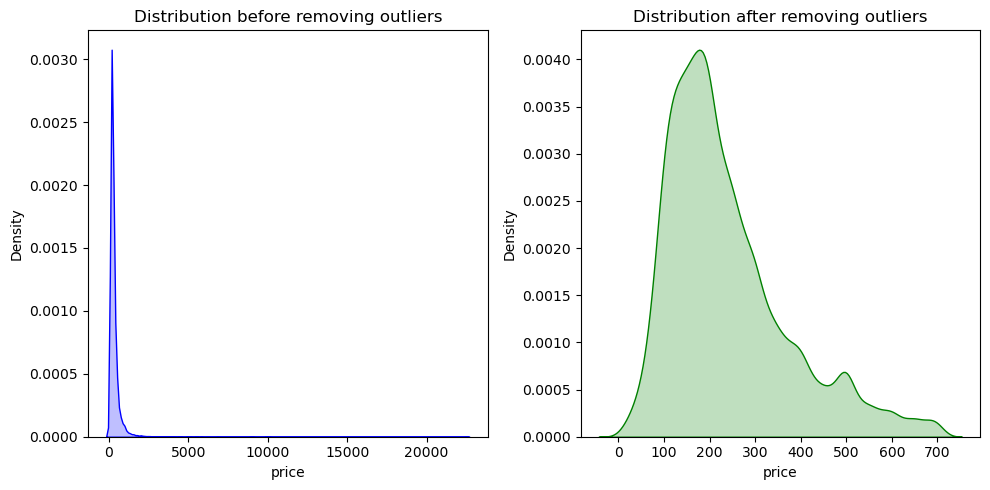

In [371]:
density_plot(not_null_listings, filter_price, 'price')

#### Removing the outliers from the minimum_nights column and plotting the histogram and the distribution graph

Since we are looking at tourist data and our target audience is tourists who stay from 1 day to 14 days (2 weeks).

In [377]:
filter_minimum_nights =  not_null_listings[not_null_listings['minimum_nights'] <= 14]
filter_minimum_nights

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_rating,instant_bookable,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,5269,100%,t,South Kohala,Hawaii,20.027400,-155.702000,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Dishes and silverware"", ""Baby...",...,4.76,f,0.23,38,4.87,4.53,4.95,4.87,5.00,4.84
1,5387,100%,t,South Kona,Hawaii,19.430810,-155.880690,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,4.66,t,1.26,224,4.68,4.41,4.85,4.88,4.75,4.77
4,7888,NaN,f,Puna,Hawaii,19.512250,-154.910200,Entire home,Entire home/apt,"[""Smoke alarm"", ""Dishes and silverware"", ""LG s...",...,4.65,f,0.74,128,4.65,4.70,4.79,4.76,4.25,4.60
5,7896,100%,t,Kihei-Makena,Maui,20.756840,-156.456310,Entire condo,Entire home/apt,"[""Hair dryer"", ""Cleaning products"", ""Smoke ala...",...,4.70,f,0.49,82,4.81,4.59,4.87,4.91,4.84,4.59
6,13238,100%,f,North Shore Kauai,Kauai,22.218439,-159.470901,Entire condo,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,4.49,t,1.46,180,4.68,4.29,4.81,4.77,4.78,4.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,1230423615309883009,100%,t,Lahaina,Maui,21.001749,-156.658604,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Cleaning products"", ""Smoke ala...",...,5.00,f,1.00,1,5.00,5.00,5.00,5.00,5.00,5.00
35071,1236422747959609437,100%,t,South Kohala,Hawaii,19.929523,-155.786529,Entire condo,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,5.00,f,1.00,1,5.00,5.00,5.00,5.00,5.00,5.00
35080,1234393529155255979,100%,t,North Shore Kauai,Kauai,22.227023,-159.485282,Private room in home,Private room,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,5.00,t,2.00,2,5.00,5.00,5.00,5.00,5.00,5.00
35085,1236584982448568316,100%,t,Primary Urban Center,Honolulu,21.286486,-157.840153,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,5.00,t,1.00,1,5.00,5.00,5.00,5.00,5.00,5.00


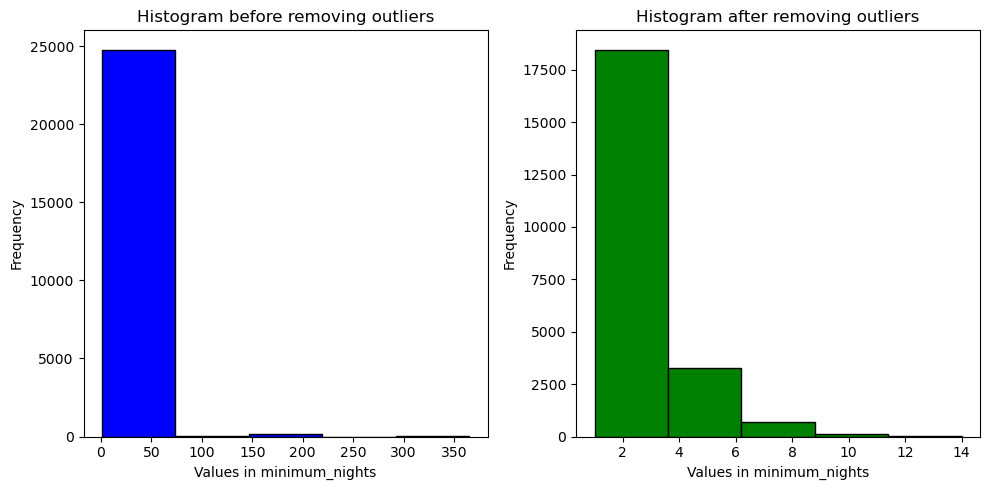

In [378]:
histogram_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

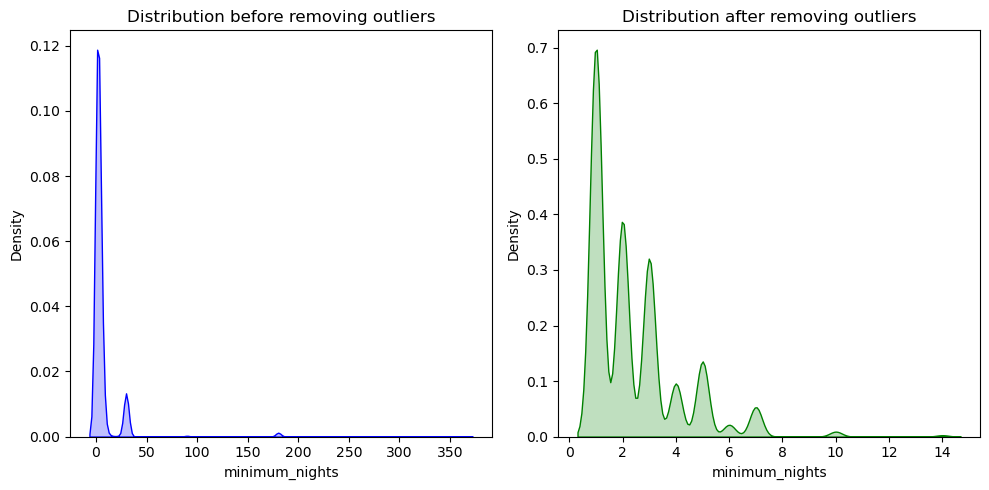

In [380]:
density_plot(not_null_listings, filter_minimum_nights, 'minimum_nights')

#### Removing the outliers from the review_scores_rating column and plotting the histogram and the distribution graph

In [384]:
filter_review_score = not_null_listings[not_null_listings['review_scores_rating'] >= 4]

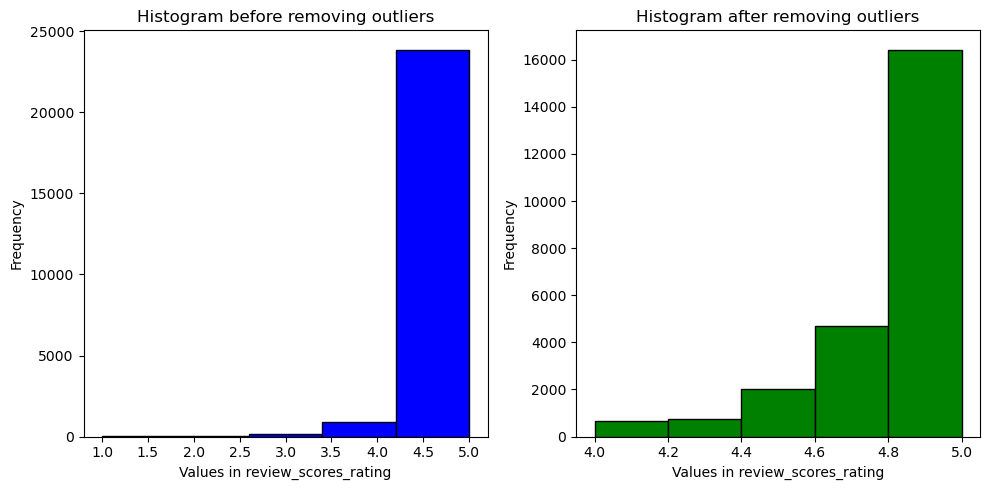

In [386]:
histogram_plot(not_null_listings, filter_review_score, 'review_scores_rating')

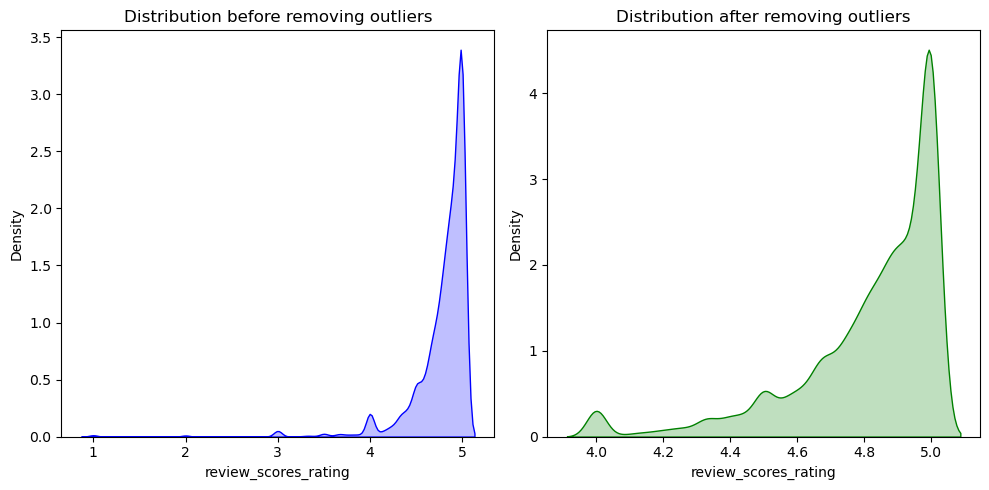

In [387]:
density_plot(not_null_listings, filter_review_score, 'review_scores_rating')

#### 3. Correlation Analysis
Create a correlation matrix to explore relationships between numerical
variables such as `price`, `number_of_reviews`, `availability_365`, and
`review_scores_rating`.
Identify any strong correlations that might be useful for predictive modeling
or further investigation.

In [390]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

correlation_matrix = listings[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.098920,-0.002734,0.065039
number_of_reviews,-0.098920,1.000000,0.045254,0.078216
availability_365,-0.002734,0.045254,1.000000,-0.118712
review_scores_rating,0.065039,0.078216,-0.118712,1.000000


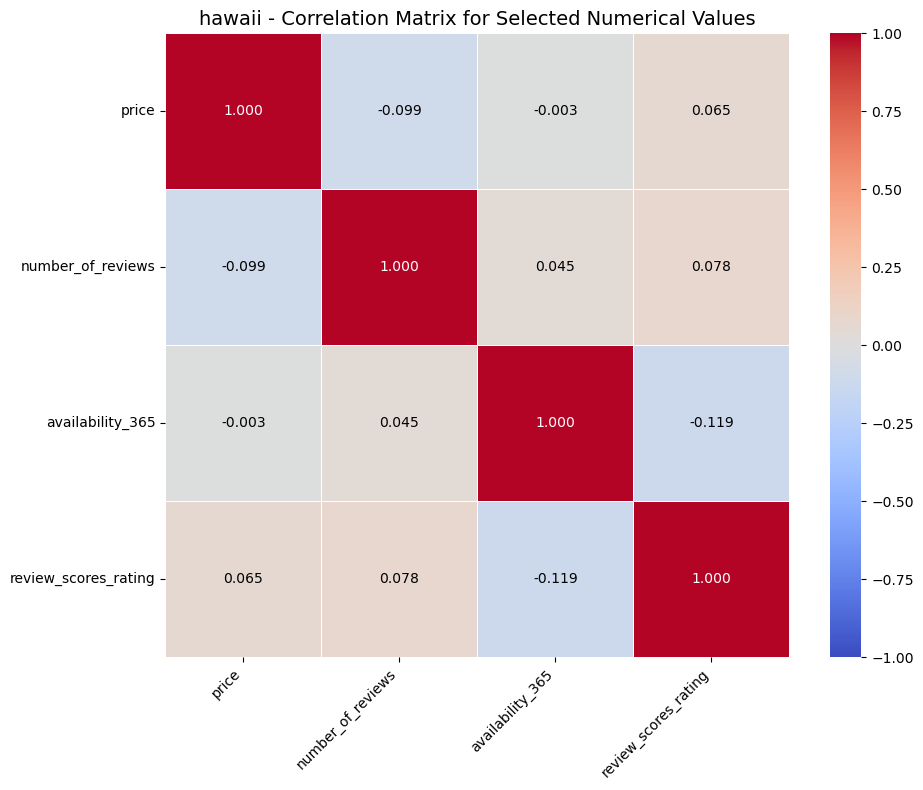

In [391]:
plt.figure(figsize=(10, 8))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix for Selected Numerical Values", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### Converting some of the categorical values such as room_type, amenities, instant_bookable, host_is_superhost, neighbourhood_group_cleansed into numerical values to find correlation

In [396]:
category_list = listings['room_type'].unique()
category_list

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [397]:
listings_copy = listings[:]

#### Converting room_type categorical values into numerical values and adding a new attribute room_type_numerical

In [399]:
listings_copy['room_type_numerical'] = pd.factorize(listings_copy['room_type'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['room_type'])[1]))

category_mapping

{0: 'Entire home/apt', 1: 'Private room', 2: 'Hotel room', 3: 'Shared room'}

#### Analyzing the feasibility of converting property_type into a numerical column

Since we have already encoded for room_type which is just a broader categorization of property_type, we do not perform encoding for this attribute

In [402]:
category_property_type = listings['property_type'].unique()
category_property_type

array(['Entire rental unit', 'Private room in cabin', 'Entire home/apt',
       'Entire home', 'Entire condo', 'Entire cabin', 'Entire guesthouse',
       'Private room in resort', 'Room in boutique hotel',
       'Entire guest suite', 'Entire bungalow', 'Farm stay',
       'Private room in hut', 'Entire place', 'Entire townhouse',
       'Private room in bed and breakfast', 'Private room in home',
       'Room in hotel', 'Entire villa', 'Entire cottage',
       'Private room in guesthouse', 'Private room in guest suite',
       'Private room in cottage', 'Private room in condo',
       'Private room in townhouse', 'Room in resort',
       'Entire vacation home', 'Private room in rental unit', 'Hut',
       'Earthen home', 'Entire loft', 'Private room in farm stay',
       'Entire bed and breakfast', 'Private room', 'Room in aparthotel',
       'Island', 'Entire serviced apartment', 'Room in bed and breakfast',
       'Private room in nature lodge', 'Tiny home', 'Shared room in home',


#### Converting amenities into a categorical value by calculating the number of amenities

In [404]:
def count_elements(text):
    if pd.isnull(text): 
        return 0
    return len(str(text).split(','))  

listings_copy['amenities_count'] = listings_copy['amenities'].apply(count_elements)
listings_copy['amenities_count']

0        38
1        35
2         4
3        38
4        33
         ..
35290    21
35291    10
35292    52
35293    23
35294    21
Name: amenities_count, Length: 35295, dtype: int64

#### Converting neighbourhood_cleansed categorical values into numerical values and adding a new attribute neighbolurhood_group_numerical

In [406]:
listings_copy['neighbourhood_group_numerical'] = pd.factorize(listings_copy['neighbourhood_group_cleansed'])[0]

category_mapping = dict(enumerate(pd.factorize(listings_copy['neighbourhood_group_cleansed'])[1]))

f'Category to number mapping: {category_mapping}'

"Category to number mapping: {0: 'Hawaii', 1: 'Honolulu', 2: 'Maui', 3: 'Kauai'}"

#### Converting host_is_superhost categorical values into numerical values and adding a new attribute host_is_superhost_numerical

In [408]:
listings_copy['host_is_superhost_numeric'] = listings_copy['host_is_superhost'].map({'t': 1, 'f': 0})
listings_copy[['host_is_superhost', 'host_is_superhost_numeric']].head()

,host_is_superhost,host_is_superhost_numeric
0,t,1.0
1,t,1.0
2,f,0.0
3,f,0.0
4,f,0.0


#### Converting instant_bookable categorical values into numerical values and adding a new attribute instant_bookable_numeric

In [410]:
listings_copy['instant_bookable_numeric'] = listings_copy['instant_bookable'].map({'t': 1, 'f': 0})
listings_copy[['instant_bookable', 'instant_bookable_numeric']].head()

,instant_bookable,instant_bookable_numeric
0,f,0
1,t,1
2,f,0
3,f,0
4,f,0


#### Plotting heatmap for correlation for additional variables

In [412]:
columns_for_correlation = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating',
                           'room_type_numerical', 'amenities_count', 'neighbourhood_group_numerical', 
                           'host_is_superhost_numeric', 'instant_bookable_numeric']

correlation_matrix = listings_copy[columns_for_correlation].corr()

correlation_matrix

,price,number_of_reviews,availability_365,review_scores_rating,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
price,1.000000,-0.098920,-0.002734,0.065039,0.049263,0.007320,0.072809,0.013667,0.053392
number_of_reviews,-0.098920,1.000000,0.045254,0.078216,-0.048155,0.179780,-0.088880,0.199063,-0.040586
availability_365,-0.002734,0.045254,1.000000,-0.118712,-0.021990,-0.009944,-0.016177,-0.129690,0.216952
review_scores_rating,0.065039,0.078216,-0.118712,1.000000,-0.054119,0.183179,-0.001851,0.250903,-0.126831
room_type_numerical,0.049263,-0.048155,-0.021990,-0.054119,1.000000,-0.125259,-0.031039,-0.155414,-0.003449
amenities_count,0.007320,0.179780,-0.009944,0.183179,-0.125259,1.000000,-0.003849,0.247862,-0.052017
neighbourhood_group_numerical,0.072809,-0.088880,-0.016177,-0.001851,-0.031039,-0.003849,1.000000,0.018945,0.085205
host_is_superhost_numeric,0.013667,0.199063,-0.129690,0.250903,-0.155414,0.247862,0.018945,1.000000,-0.076976
instant_bookable_numeric,0.053392,-0.040586,0.216952,-0.126831,-0.003449,-0.052017,0.085205,-0.076976,1.000000


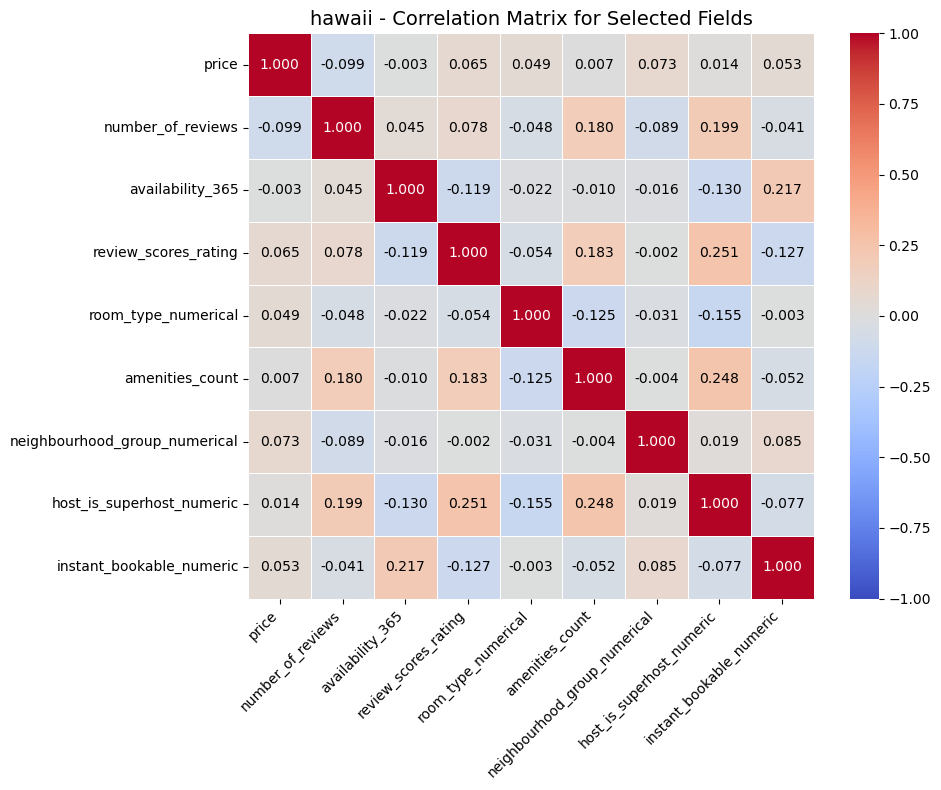

In [413]:
plt.figure(figsize=(10, 8))
    
ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=10)

plt.title(f"{city} - Correlation Matrix for Selected Fields", fontsize=14)
    
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
    
plt.tight_layout()
plt.show()

#### 4. Price Analysis
Analyze the distribution of prices across different neighborhoods
(`host_neighbourhood`) or room types (if available). Understand which
neighborhoods have higher or lower average prices and whether certain
neighborhoods are more popular for shortterm or longterm stays.

#### 4.1 We group the listings based on neighbourhood groups and calculate the mean price for each neighbourhood

In [416]:
price_not_null_listings = listings.dropna(subset=['price'])

In [417]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_group_cleansed', as_index=False)['price'].mean()
grouped_neighbourhoods

,neighbourhood_group_cleansed,price
0,Hawaii,306.751632
1,Honolulu,325.405360
2,Kauai,461.591334
3,Maui,418.883140


#### We plot the function to plot the bar graph for the distribution of price based on different factors

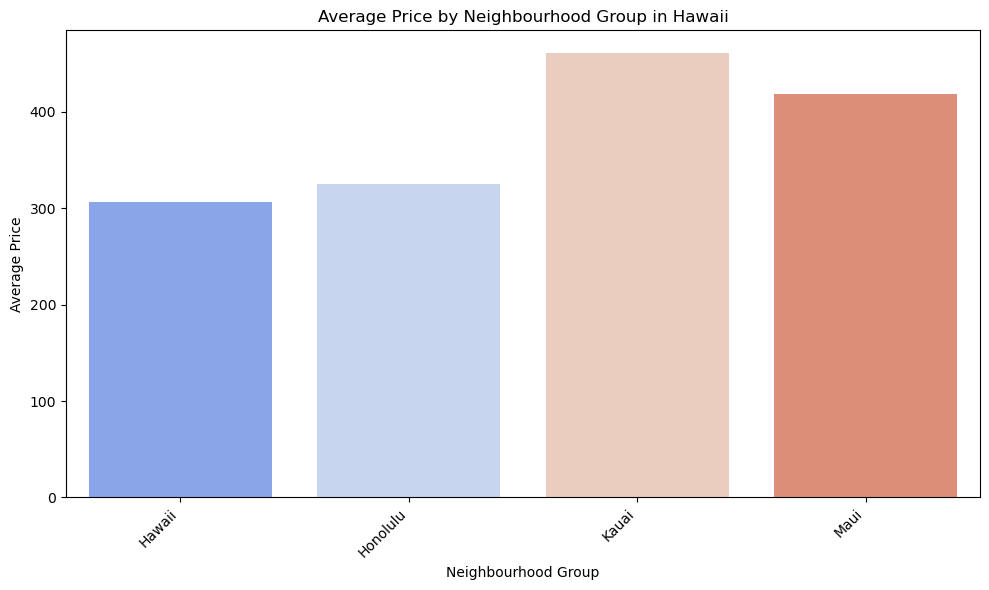

In [419]:
def plot_bargraph(df, axis, label):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=axis, y='price', data=df, palette='coolwarm')
    
    plt.xlabel(label)
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {label} in {city.capitalize()}')
    
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    

plot_bargraph(grouped_neighbourhoods, 'neighbourhood_group_cleansed', 'Neighbourhood Group')

In [420]:
grouped_neighbourhoods.isnull().sum()

neighbourhood_group_cleansed    0
price                           0
dtype: int64

In [421]:
price_not_null_listings_room_type = listings_copy.dropna(subset=['price'])
price_not_null_listings_room_type

,id,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,amenities,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,room_type_numerical,amenities_count,neighbourhood_group_numerical,host_is_superhost_numeric,instant_bookable_numeric
0,5269,100%,t,South Kohala,Hawaii,20.027400,-155.702000,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Dishes and silverware"", ""Baby...",...,4.53,4.95,4.87,5.00,4.84,0,38,0,1.0,0
1,5387,100%,t,South Kona,Hawaii,19.430810,-155.880690,Entire rental unit,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,4.41,4.85,4.88,4.75,4.77,0,35,0,1.0,1
2,5480,NaN,f,Puna,Hawaii,19.441490,-154.915270,Private room in cabin,Private room,"[""Kitchen"", ""Free parking on premises"", ""Break...",...,NaN,NaN,NaN,NaN,NaN,1,4,0,0.0,0
4,7888,NaN,f,Puna,Hawaii,19.512250,-154.910200,Entire home,Entire home/apt,"[""Smoke alarm"", ""Dishes and silverware"", ""LG s...",...,4.70,4.79,4.76,4.25,4.60,0,33,0,0.0,0
5,7896,100%,t,Kihei-Makena,Maui,20.756840,-156.456310,Entire condo,Entire home/apt,"[""Hair dryer"", ""Cleaning products"", ""Smoke ala...",...,4.59,4.87,4.91,4.84,4.59,0,61,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35290,1243656937641650163,NaN,f,Ewa,Honolulu,21.330518,-158.122404,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Lake access"", ""Noise decibel ...",...,NaN,NaN,NaN,NaN,NaN,0,21,1,0.0,1
35291,1243696944817783437,100%,f,North Shore Oahu,Honolulu,21.570560,-158.120060,Entire home,Entire home/apt,"[""BBQ grill"", ""Smoke alarm"", ""Free parking on ...",...,NaN,NaN,NaN,NaN,NaN,0,10,1,0.0,0
35292,1243776690758997218,100%,NaN,Primary Urban Center,Honolulu,21.275250,-157.821810,Entire rental unit,Entire home/apt,"[""Folding or convertible high chair - always a...",...,NaN,NaN,NaN,NaN,NaN,0,52,1,NaN,0
35293,1243786336236102110,99%,f,Primary Urban Center,Honolulu,21.284374,-157.838440,Entire condo,Entire home/apt,"[""Hair dryer"", ""Smoke alarm"", ""Dishes and silv...",...,NaN,NaN,NaN,NaN,NaN,0,23,1,0.0,1


#### 4.2 We group the listings based on room_type and calculate the mean price for each neighbourhood

In [423]:
room_types_grouped = price_not_null_listings_room_type.groupby('room_type_numerical', as_index=False)['price'].mean()
room_types_grouped

,room_type_numerical,price
0,0,358.528036
1,1,485.761786
2,2,626.234266
3,3,117.885714


#### Plotting the bar graph for price distribution based on room_type

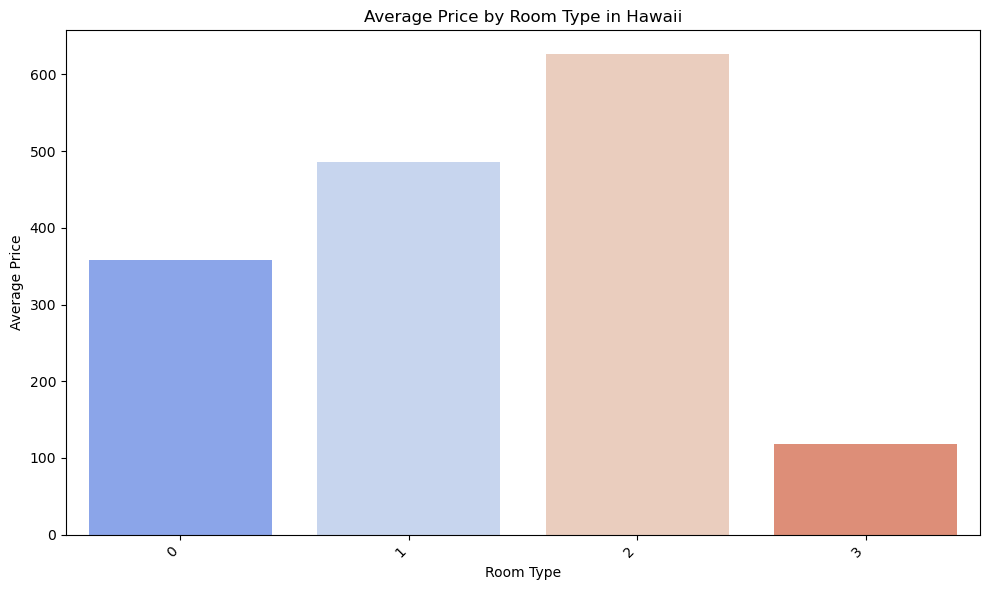

In [425]:
plot_bargraph(room_types_grouped, 'room_type_numerical', 'Room Type')

#### Plotting heatmap for price based on latitude and longitude

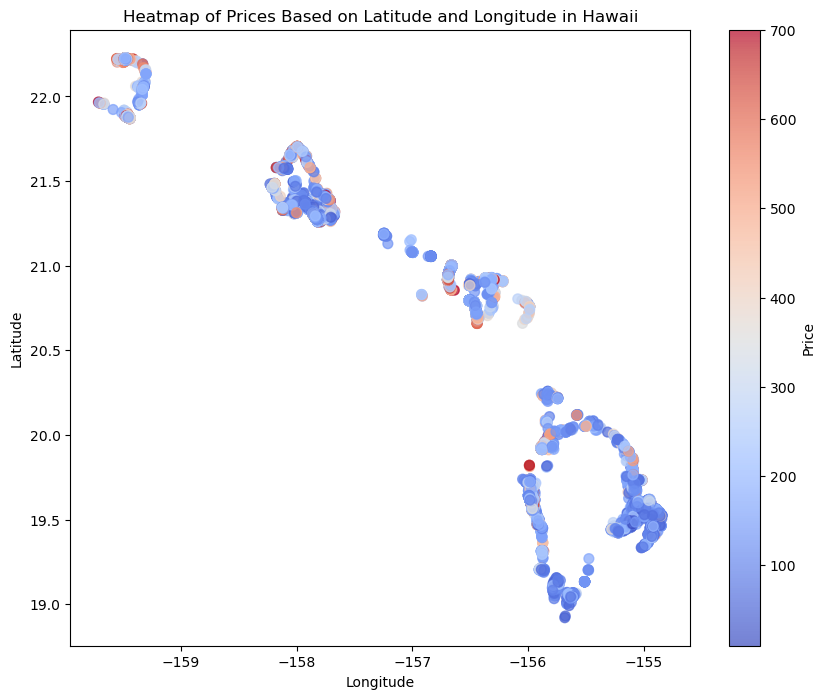

In [427]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_price['longitude'], 
    y=filter_price['latitude'], 
    c=filter_price['price'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Heatmap of Prices Based on Latitude and Longitude in {city.capitalize()}')

plt.show()

#### 4.1 We group the listings based on neighbourhood_groups and calculate the mean minimum_nights for each neighbourhood

In [429]:
price_not_null_listings['minimum_nights'].describe()

count    31763.000000
mean         9.225892
std         30.073801
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        367.000000
Name: minimum_nights, dtype: float64

In [492]:
grouped_neighbourhoods = price_not_null_listings.groupby('neighbourhood_group_cleansed', as_index=False)['minimum_nights'].mean()
grouped_neighbourhoods

,neighbourhood_group_cleansed,minimum_nights
0,Hawaii,3.287671
1,Honolulu,11.161699
2,Kauai,12.511166
3,Maui,10.436169


#### We categorize the stays as Short term, Medium term and Long Term based on duration

In [494]:
def categorize_stay(nights):
    if nights <= 30: return 'Short Term'
    elif nights > 90: return 'Long Term'
    else: return 'Medium Term'

price_not_null_listings['stay_type'] = price_not_null_listings['minimum_nights'].apply(categorize_stay)

grouped_stay_type = price_not_null_listings.groupby(['neighbourhood_group_cleansed', 'stay_type'], as_index=False).size()

pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_group_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Predominant Stay Type'] = pivoted_stay_type[['Short Term', 'Long Term']].idxmax(axis=1)

pivoted_stay_type

stay_type,Long Term,Medium Term,Short Term,Predominant Stay Type
neighbourhood_group_cleansed,,,,
Hawaii,4,53,7754,Short Term
Honolulu,33,109,8850,Short Term
Kauai,303,1,4935,Short Term
Maui,369,2,9350,Short Term


#### Inorder to express it as a relative value we convert it into percentage. 

In [434]:
pivoted_stay_type = grouped_stay_type.pivot(index='neighbourhood_group_cleansed', columns='stay_type', values='size').fillna(0)

pivoted_stay_type['Total Stays'] = pivoted_stay_type.sum(axis=1)

pivoted_stay_type['Short Term %'] = (pivoted_stay_type['Short Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Medium Term %'] = (pivoted_stay_type['Medium Term'] / pivoted_stay_type['Total Stays']) * 100
pivoted_stay_type['Long Term %'] = (pivoted_stay_type['Long Term'] / pivoted_stay_type['Total Stays']) * 100

pivoted_stay_type_percentage = pivoted_stay_type[['Short Term %', 'Medium Term %', 'Long Term %']]

pivoted_stay_type_percentage['Predominant Stay Type'] = pivoted_stay_type_percentage[['Short Term %', 'Medium Term %', 'Long Term %']].idxmax(axis=1)

pivoted_stay_type_percentage

stay_type,Short Term %,Medium Term %,Long Term %,Predominant Stay Type
neighbourhood_group_cleansed,,,,
Hawaii,99.270260,0.678530,0.051210,Short Term %
Honolulu,98.420819,1.212189,0.366993,Short Term %
Kauai,94.197366,0.019088,5.783546,Short Term %
Maui,96.183520,0.020574,3.795906,Short Term %


### 5. Neighborhood Comparison
Compare the average `review_scores_rating` across different
neighborhoods. Determine if certain neighborhoods have consistently higher
ratings, which could indicate better or worse guest experiences.

#### We plot a heatmap of the `review_scores_rating` based on the **Latitude and the Longitude**

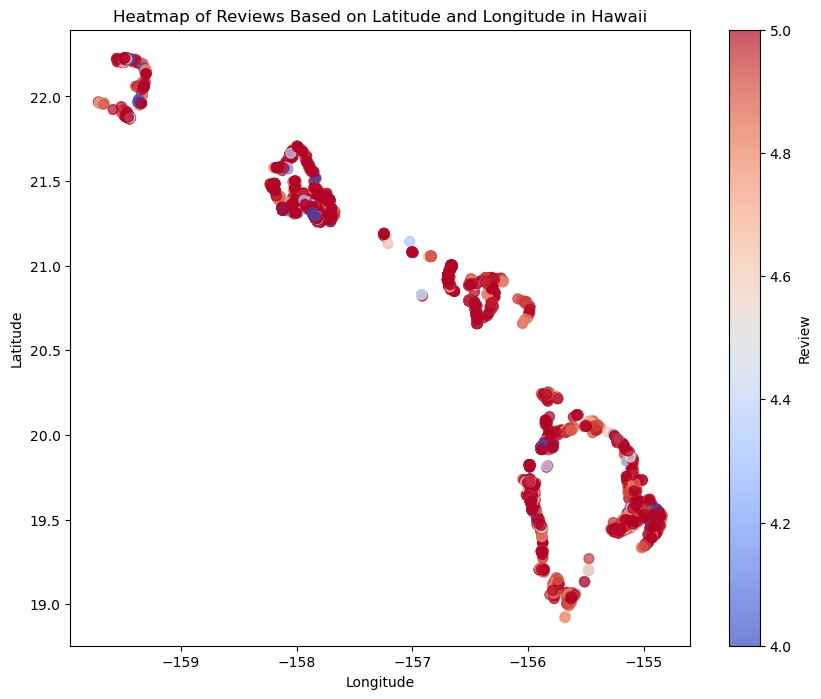

In [437]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=filter_review_score['longitude'], 
    y=filter_review_score['latitude'], 
    c=filter_review_score['review_scores_rating'],
    cmap='coolwarm',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Review')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Heatmap of Reviews Based on Latitude and Longitude in {city.capitalize()}')

plt.show()

#### We grouped the listings based on the neighbourhood group and calculated the average rating for each of the neighbourhoods

In [439]:
grouped_neighbourhoods_reviews = listings.groupby('neighbourhood_group_cleansed', as_index=False)['review_scores_rating'].mean()
grouped_neighbourhoods_reviews

,neighbourhood_group_cleansed,review_scores_rating
0,Hawaii,4.811961
1,Honolulu,4.738456
2,Kauai,4.793005
3,Maui,4.793287


In [440]:
def categorize_review(rating):
    if rating > 4.75:
        return 'Top Review'
    elif rating < 3:
        return 'Low Review'
    else:
        return 'Good Review'

price_not_null_listings['review_category'] = price_not_null_listings['review_scores_rating'].apply(categorize_review)

review_counts = price_not_null_listings.groupby('neighbourhood_group_cleansed')['review_category'].value_counts(normalize=True).unstack(fill_value=0)

review_counts_percentage = review_counts * 100

review_counts_percentage

review_category,Good Review,Low Review,Top Review
neighbourhood_group_cleansed,,,
Hawaii,38.509794,0.179234,61.310972
Honolulu,49.588523,0.355872,50.055605
Kauai,43.863333,0.171789,55.964879
Maui,44.707335,0.226314,55.066351


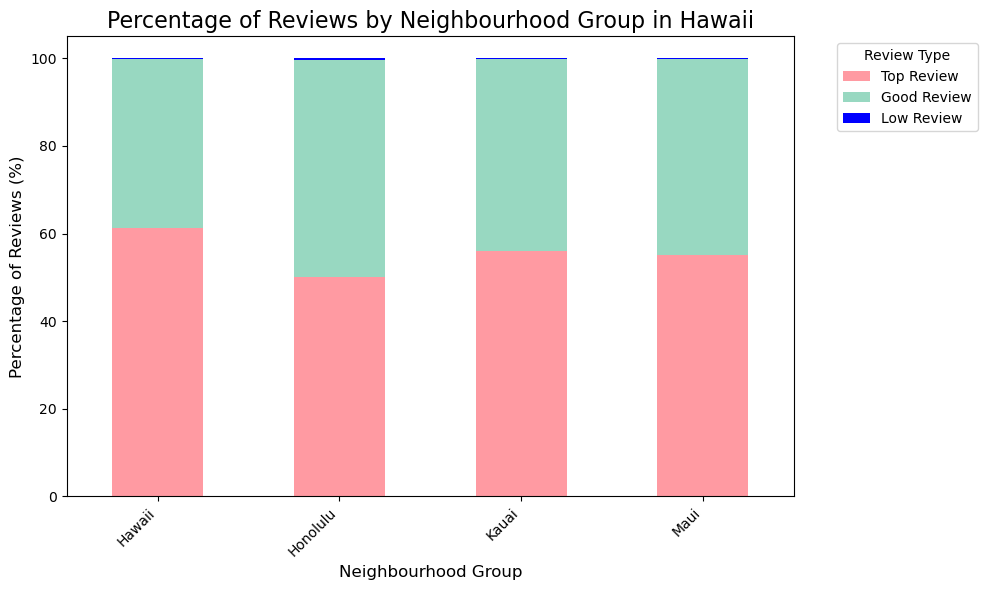

In [441]:
sorted_columns = review_counts_percentage.sort_values(by=review_counts_percentage.index[-1], axis=1, ascending=False).columns

darker_pastel_colors = ['#FF9AA2', '#98D8C1', 'blue']

review_counts_percentage[sorted_columns].plot(kind='bar', stacked=True, figsize=(10, 6), color=darker_pastel_colors)

plt.title(f'Percentage of Reviews by Neighbourhood Group in {city.capitalize()}', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Review Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 7. Text Length: Create a new feature that measures the length of each
review (number of words or characters). Determine if the length of a review
correlates with its sentiment or the review score.


In [445]:
city = 'hawaii'
reviews = pd.read_csv(f'data/{city}/reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282098 entries, 0 to 1282097
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1282098 non-null  int64 
 1   id             1282098 non-null  int64 
 2   date           1282098 non-null  object
 3   reviewer_id    1282098 non-null  int64 
 4   reviewer_name  1282097 non-null  object
 5   comments       1281851 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.7+ MB


##### preprocessing the comments on the review

In [447]:
# Dropping the null values
reviews = reviews.dropna(subset=['comments'])
reviews['comments'] = reviews['comments'].astype('string')

##### Creating functions for preprocessing the comments (Removing HTML Tags, Special Characters and converting the text to lower so that all text data are standard)

In [449]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def count_word(sentence):
     return len(sentence.split(" "))

def get_sentiment(sentence):
    analysis = TextBlob(sentence)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

In [450]:
reviews['cleaned_comments'] = reviews['comments'].apply(preprocess_text)
reviews['number_of_words'] = reviews['cleaned_comments'].apply(count_word)
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words
0,5269,289800,2011-05-31,452192,Gert,Very warm welcome. Great place to stay. Highl...,very warm welcome great place to stay highly r...,11
1,5269,742885,2011-11-25,1135109,Lene,Barrie was very kind and sweet but it could no...,barrie was very kind and sweet but it could no...,61
2,5269,494178707,2019-07-23,131185347,Kathleen,"Great place, location & wonderful hostess. Tha...",great place location wonderful hostess thanks ...,10
3,5269,523932651,2019-09-04,5708075,Martha,This is such a charming and cozy place to stay...,this is such a charming and cozy place to stay...,62
4,5269,536049410,2019-09-25,85727419,Brent,Cute little place with easy access to Waimea a...,cute little place with easy access to waimea a...,15
...,...,...,...,...,...,...,...,...
1282093,1233022331313313632,1240829107942825971,2024-09-07,589442498,Nicholas,What an amazing location!! 10 minutes from sun...,what an amazing location 10 minutes from sunse...,74
1282094,1233022331313313632,1242271780889531282,2024-09-09,247312595,Leilani,Great place to stay!! No complaints at all ver...,great place to stay no complaints at all very ...,13
1282095,1233421456773106336,1242347285489616067,2024-09-09,95976887,Jeong Hun,"Friendly host, beautiful place. The natural po...",friendly host beautiful place the natural pool...,15
1282096,1234393529155255979,1237989708767985699,2024-09-03,420755921,Sennai,Great place and gracious host with no drama. W...,great place and gracious host with no drama wo...,10


##### Convert the data into chunks so that it is easier to do the do the sentiment analysis using the textblob

In [452]:
def process_chunk(chunk):
    chunk['sentiment'] = chunk['cleaned_comments'].apply(get_sentiment)
    return chunk

chunk_size = 1_00_000
chunks = [reviews[i:i + chunk_size] for i in range(0, reviews.shape[0], chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_chunk(chunk)
    processed_chunks.append(processed_chunk)

final_reviews = pd.concat(processed_chunks, ignore_index=True)

final_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,number_of_words,sentiment
0,5269,289800,2011-05-31,452192,Gert,Very warm welcome. Great place to stay. Highl...,very warm welcome great place to stay highly r...,11,1
1,5269,742885,2011-11-25,1135109,Lene,Barrie was very kind and sweet but it could no...,barrie was very kind and sweet but it could no...,61,1
2,5269,494178707,2019-07-23,131185347,Kathleen,"Great place, location & wonderful hostess. Tha...",great place location wonderful hostess thanks ...,10,1
3,5269,523932651,2019-09-04,5708075,Martha,This is such a charming and cozy place to stay...,this is such a charming and cozy place to stay...,62,1
4,5269,536049410,2019-09-25,85727419,Brent,Cute little place with easy access to Waimea a...,cute little place with easy access to waimea a...,15,1


##### Total count of positive, negative and neutral reviews

In [454]:
# Netural Review
(final_reviews['sentiment'] == 0).sum()

54954

In [455]:
# Negative Review
(final_reviews['sentiment'] < 0).sum()

13205

In [456]:
# Positive Review
(final_reviews['sentiment'] > 0).sum()

1213692

##### Removing all the neutral comments from the dataframe

In [458]:
final_reviews = final_reviews[final_reviews['sentiment'] != 0]

##### Calculating the correaltion between the number of words in the reviews and the associated sentiment

In [460]:
columns_for_correlation = ['number_of_words', 'sentiment']

correlation_matrix = final_reviews[columns_for_correlation].corr()

correlation_matrix

,number_of_words,sentiment
number_of_words,1.000000,-0.041845
sentiment,-0.041845,1.000000


In [ ]:
grouped_df = final_reviews.groupby('listing_id', as_index=False)['number_of_words'].sum()
grouped_df

##### Merging the reviews dataframe and the listing dataframe

In [ ]:
merged = pd.merge(
    grouped_df[['number_of_words', 'listing_id']],
    listings[['review_scores_rating', 'id']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)
merged

##### Calculating the correlation between the number of words and the review score rating

In [ ]:
columns_for_correlation = ['number_of_words', 'review_scores_rating']

correlation_matrix = merged[columns_for_correlation].corr()

correlation_matrix

In [ ]:
final_reviews[final_reviews['sentiment'] > 0]['number_of_words'].mean()

In [ ]:
final_reviews[final_reviews['sentiment'] < 0]['number_of_words'].mean()

#### 8. Keyword Extraction
Identify and count the occurrence of specific keywords (e.g., "clean,"
"comfortable," "noisy") in the reviews. Generate new features based on the
presence of these keywords, which might influence guest satisfaction.

##### Using the `sentiment` field to categorize the word is positive or negative 

In [ ]:
positive_reviews = final_reviews[final_reviews['sentiment'] == 1]

In [ ]:
negative_reviews = final_reviews[final_reviews['sentiment'] == -1]

In [ ]:
def wordcloud(df):
    all_comments = ' '.join(df['cleaned_comments'])

    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_comments)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud of Reviews')
    plt.show()

##### Generating the word cloud for the positive reviews and negative reviews

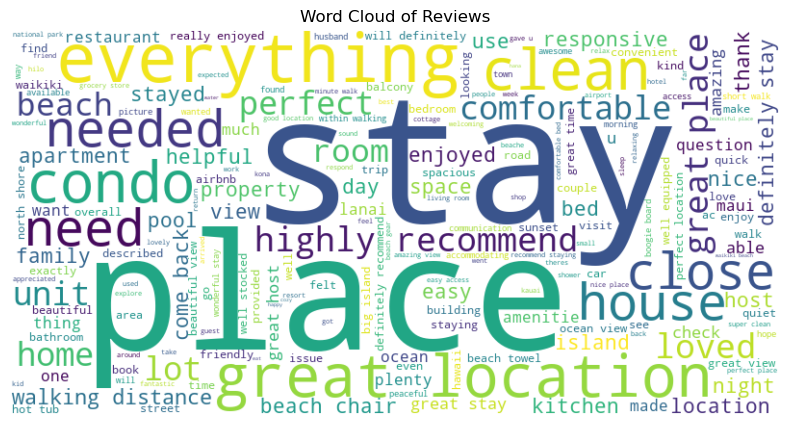

In [480]:
wordcloud(positive_reviews)

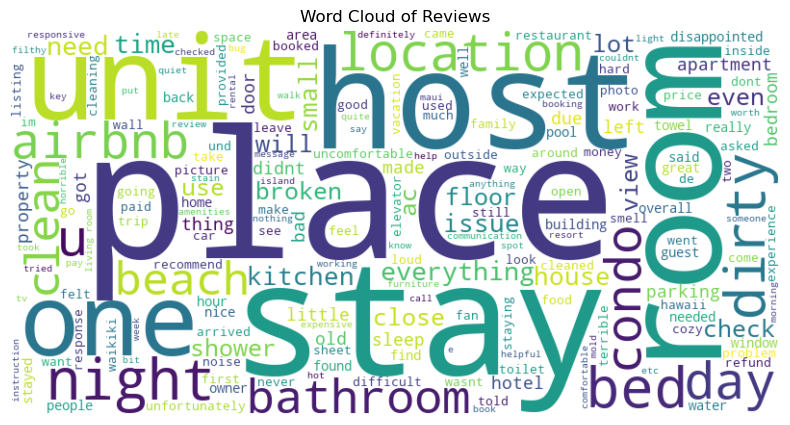

In [481]:
wordcloud(negative_reviews)

In [482]:
positive_words = ['loved', 'spacious', 'great', 'responsive', 'love', 'enjoy', 'perfect', 'clean', 'comfortable', 'recommend', 'kind']
negative_words = ['noise', 'little', 'broken', 'disappointed', 'leave', 'rude', 'unhelpful', 'expensive', 'overpriced', 'outdated', 'cramped']

df = pd.merge(
    final_reviews[['number_of_words', 'listing_id', 'sentiment']],
    listings[['review_scores_rating', 'id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value']],
    left_on='listing_id',
    right_on='id',
    how='inner'
)

df['positive_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in positive_words if kw in x.lower()]))
df['negative_count'] = final_reviews['cleaned_comments'].apply(lambda x: sum([1 for kw in negative_words if kw in x.lower()]))
df.head()

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
0,11,5269,1,4.76,5269,4.76,4.87,4.53,4.95,4.87,5.0,4.84,2.0,0.0
1,61,5269,1,4.76,5269,4.76,4.87,4.53,4.95,4.87,5.0,4.84,1.0,0.0
2,10,5269,1,4.76,5269,4.76,4.87,4.53,4.95,4.87,5.0,4.84,1.0,0.0
3,62,5269,1,4.76,5269,4.76,4.87,4.53,4.95,4.87,5.0,4.84,1.0,1.0
4,15,5269,1,4.76,5269,4.76,4.87,4.53,4.95,4.87,5.0,4.84,0.0,1.0


In [483]:
correlation_matrix = df.corr()

correlation_matrix

,number_of_words,listing_id,sentiment,review_scores_rating,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,positive_count,negative_count
number_of_words,1.000000,-0.023589,-0.041845,0.009956,-0.023589,0.009956,0.001639,0.001858,0.006539,0.000227,0.002342,0.014520,0.000600,-0.000500
listing_id,-0.023589,1.000000,-0.006641,0.043449,1.000000,0.043449,-0.020565,0.046651,-0.061735,0.000237,-0.033729,-0.018145,0.000743,-0.010472
sentiment,-0.041845,-0.006641,1.000000,0.099952,-0.006641,0.099952,0.095224,0.084293,0.076933,0.084112,0.059590,0.088232,-0.000674,-0.000031
review_scores_rating,0.009956,0.043449,0.099952,1.000000,0.043449,1.000000,0.875210,0.826055,0.672112,0.739687,0.480763,0.827889,-0.002025,-0.000761
id,-0.023589,1.000000,-0.006641,0.043449,1.000000,0.043449,-0.020565,0.046651,-0.061735,0.000237,-0.033729,-0.018145,0.000743,-0.010472
review_scores_rating,0.009956,0.043449,0.099952,1.000000,0.043449,1.000000,0.875210,0.826055,0.672112,0.739687,0.480763,0.827889,-0.002025,-0.000761
review_scores_accuracy,0.001639,-0.020565,0.095224,0.875210,-0.020565,0.875210,1.000000,0.756802,0.650896,0.708537,0.455552,0.796115,-0.001192,0.000556
review_scores_cleanliness,0.001858,0.046651,0.084293,0.826055,0.046651,0.826055,0.756802,1.000000,0.551224,0.597615,0.341707,0.691146,-0.000676,-0.000244
review_scores_checkin,0.006539,-0.061735,0.076933,0.672112,-0.061735,0.672112,0.650896,0.551224,1.000000,0.703510,0.362920,0.612764,-0.001145,0.001616
review_scores_communication,0.000227,0.000237,0.084112,0.739687,0.000237,0.739687,0.708537,0.597615,0.703510,1.000000,0.348851,0.679791,-0.002635,0.002000


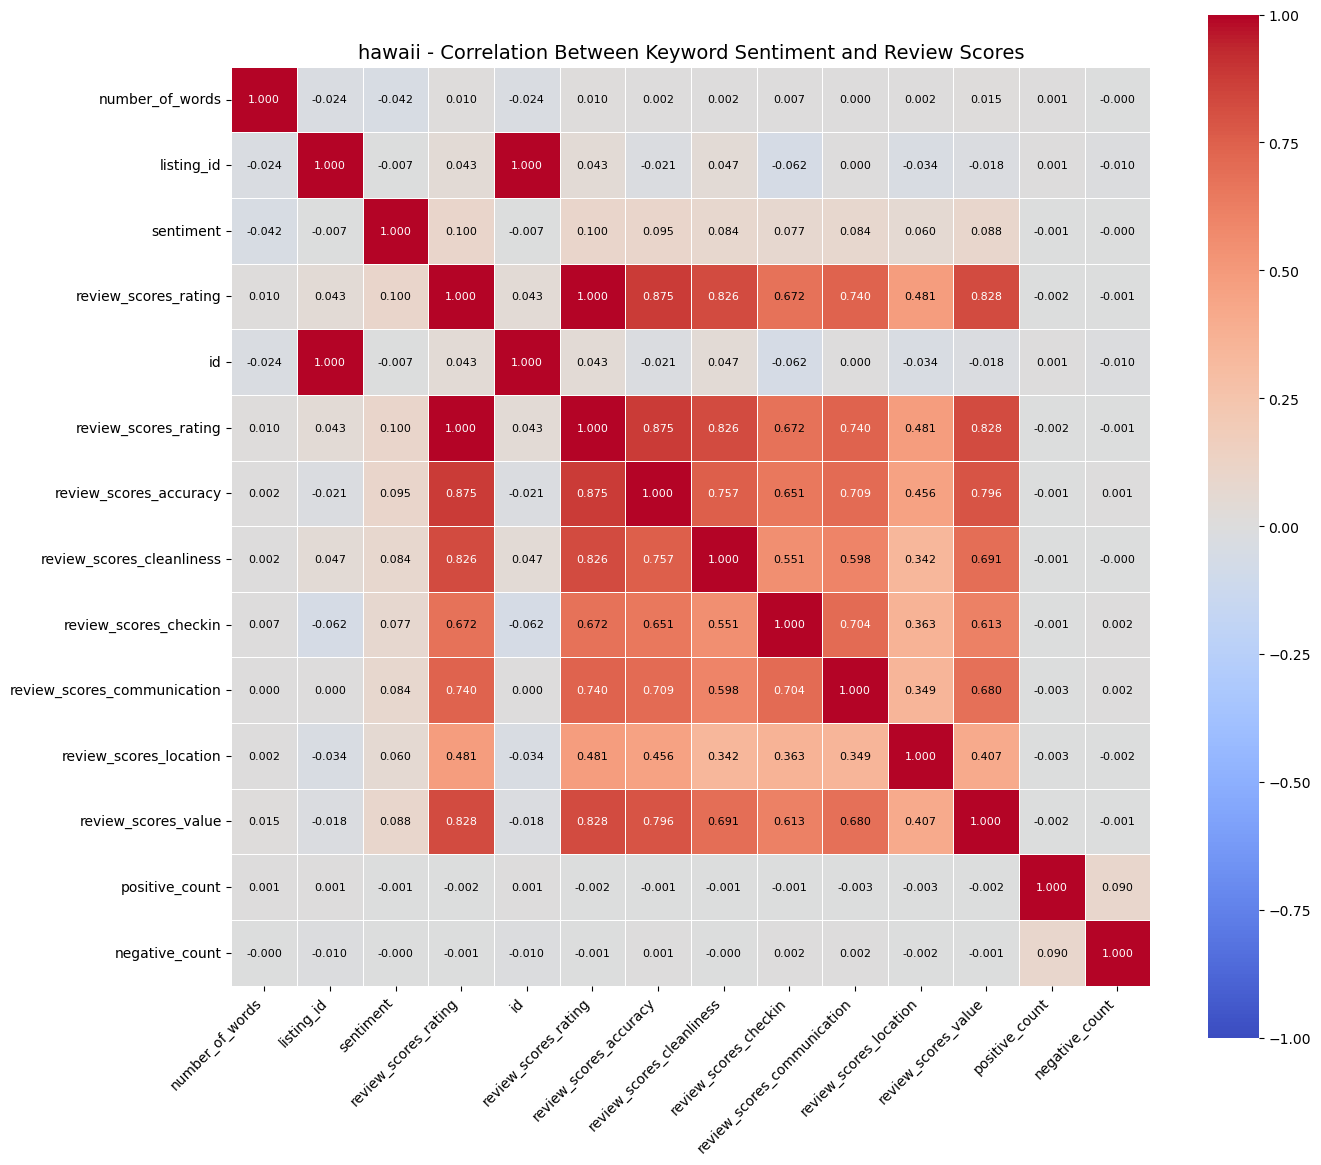

In [490]:
def plot_correlation_heatmap(correlation_matrix, city):
    plt.figure(figsize=(14, 12))
    
    ax = sns.heatmap(correlation_matrix, 
                     cmap='coolwarm', 
                     vmin=-1, vmax=1,
                     square=True,
                     linewidths=0.5)

    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            text = f"{correlation_matrix.iloc[i, j]:.3f}"
            ax.text(j + 0.5, i + 0.5, text,
                    ha="center", va="center", 
                    color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white",
                    fontsize=8)

    plt.title(f"{city} - Correlation Between Keyword Sentiment and Review Scores", fontsize=14)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(correlation_matrix, city)